# Purpose: Do analytically integrable functional fits from 1750-2011 to radiative shielding for land use change affect on albedo

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import csv
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17Forcings')

Read two input files separately and assign the year values and methane concentration data

In [2]:
df1 = pd.read_excel('heat17parameters27dec.xlsx')
df1.to_csv('heat18parameters27jun.csv',header=False,index=False)
df1 = pd.read_csv('heat18parameters27jun.csv')
df1.drop(df1.head(1).index, inplace=True)
df1.index = np.arange(0, len(df1))
# print (df1)

df2 = pd.read_csv('OtherForcings.csv')
df2.drop(df2.tail(5).index,inplace=True) # drop last 5 rows
df2.drop(df2.head(6).index, inplace=True)

df2.index = np.arange(0, len(df2))
print (df2) 

     Year     CO2  GHG OTher*  O3 (Trop)  O3 (Strat)  Aerosol (Total)     LUC  \
0    1756 -0.0264      0.0112     0.0025      0.0000          -0.0107 -0.0024   
1    1757 -0.0272      0.0125     0.0030      0.0000          -0.0125 -0.0028   
2    1758 -0.0279      0.0138     0.0034      0.0000          -0.0143 -0.0032   
3    1759 -0.0284      0.0149     0.0038      0.0000          -0.0161 -0.0036   
4    1760 -0.0288      0.0158     0.0042      0.0000          -0.0178 -0.0040   
5    1761 -0.0290      0.0167     0.0047      0.0000          -0.0196 -0.0044   
6    1762 -0.0290      0.0172     0.0051      0.0000          -0.0214 -0.0048   
7    1763 -0.0285      0.0176     0.0055      0.0000          -0.0232 -0.0052   
8    1764 -0.0275      0.0179     0.0059      0.0000          -0.0250 -0.0056   
9    1765 -0.0261      0.0181     0.0064      0.0000          -0.0268 -0.0060   
10   1766 -0.0243      0.0182     0.0068      0.0000          -0.0285 -0.0064   
11   1767 -0.0221      0.018

In [3]:
yrs = df2.iloc[:,0:1]


print (yrs)
shield = df2.iloc[:,6:7]
shield = shield.multiply(-1)
# shield = -data2[[All, 7]]
print (shield)
df3 = pd.merge(yrs, shield, left_index =True, right_index =True,how='outer')
df3 = df3.astype(float)



     Year
0    1756
1    1757
2    1758
3    1759
4    1760
5    1761
6    1762
7    1763
8    1764
9    1765
10   1766
11   1767
12   1768
13   1769
14   1770
15   1771
16   1772
17   1773
18   1774
19   1775
20   1776
21   1777
22   1778
23   1779
24   1780
25   1781
26   1782
27   1783
28   1784
29   1785
..    ...
226  1982
227  1983
228  1984
229  1985
230  1986
231  1987
232  1988
233  1989
234  1990
235  1991
236  1992
237  1993
238  1994
239  1995
240  1996
241  1997
242  1998
243  1999
244  2000
245  2001
246  2002
247  2003
248  2004
249  2005
250  2006
251  2007
252  2008
253  2009
254  2010
255  2011

[256 rows x 1 columns]
        LUC
0    0.0024
1    0.0028
2    0.0032
3    0.0036
4    0.0040
5    0.0044
6    0.0048
7    0.0052
8    0.0056
9    0.0060
10   0.0064
11   0.0068
12   0.0072
13   0.0076
14   0.0080
15   0.0084
16   0.0088
17   0.0092
18   0.0096
19   0.0100
20   0.0104
21   0.0108
22   0.0112
23   0.0116
24   0.0120
25   0.0124
26   0.0128
27   0.0132
28   0.0

Note that the earth's albedo from 2000-2012 varied seasonally by no more than plus or minus 4% over an average of 0.3 with no evident secular trend NASA Earth Observatory, Measuring Earth's Albedo, 21 October 2014, https://earthobservatory.nasa.gov/IOTD/view.php?id=84499

[1.43922679e-01 1.95384484e+03 1.94656360e+01 9.20193110e+00
 1.89807867e+03 4.50288966e+01]


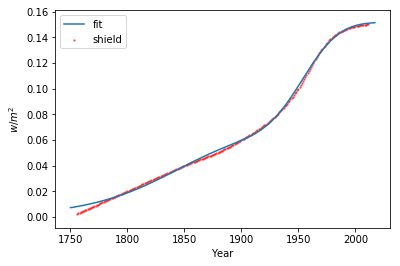

268
268
256
0.15030900536428926


In [4]:
yrs = yrs['Year'].tolist()
yrs = list(map(float, yrs))

shield= shield['LUC'].tolist()
shield = list(map(float, shield))

def dudt(t,b5,b6):
    y = np.gradient(1/(1 + np.exp(-(t - b5)/b6)),t)
    return y

def fit(t,b1,b2,b3,b4,b5,b6):
    y = b1/(1+np.exp(-(yrs-b2)/b3)) + b4*dudt(t,b5,b6)
    return y

param_bounds=([0,1900,0,0,1850,0],[0.5,2000,50,20,2000,50])
popt,pcov = curve_fit(fit, yrs, shield, bounds=param_bounds)
print (popt)

df3.plot.scatter(x="Year", y="LUC", color = 'r',label ='shield', s=2, alpha = 0.5)

yrs = range(1750,2018)
y = fit(yrs, *popt)
plt.plot(yrs,y, label="fit")
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('$w/m^2$') 
plt.savefig('albedo.eps',dpi=1000)
plt.savefig('albedo.pdf',dpi=1000)
plt.show()

# print (yrs)
print (len(yrs))
print (len(y))

itemindex = yrs.index(2006)
print(itemindex)
print(y[itemindex])

Year 1750 albedo and emissivity

In [5]:
c18 = 1359.49/4
albedo = 0.30 - y[itemindex]/c18
print (albedo)
# print ((1-albedo)*c18)

0.29955774884592223
